# **MEEN 423: Machine Learning for Mechanical Engineers**
# Homework 4: Binary classification with Artificial Neural Networks

## Objective

Train a binary classifier using an ANN to understand its performance and characteristics. Analyze and visualize the dataset, train different models, evaluate their performance, and draw insights from various metrics and visualizations.

## Background

In a power generation plant, turbine blades are critical components for generating electricity. These blades convert the energy from steam into mechanical energy that drives the generator. However, over time, the turbine blades are subjected to extreme conditions leading to wear, corrosion, and other forms of degradation.

In this dataset, we have sensor readings from a number of turbine blades. Two features are particularly significant:

    * Vibration Frequency (Hz): This is measured by a vibration sensor attached to the base of each turbine blade.
    * Temperature (°C): This is measured by a temperature sensor embedded within the blade.

Each blade has a label:

    * 1(True): Indicates that the blade has a defect
    * 0(False): Indicates that the blade is in normal condition.

Detecting defective blades early is crucial to ensure the efficiency, safety, and longevity of the power plant. Your task is to develop a classifier to identify potentially defected turbine blades based on these two sensor readings.

## Tasks

### 1. Data Visualization

#### A. Plot the dataset with vibration frequency on the x-axis and temperature on the y-axis. Use different markers or colors to distinguish between normal and defected components.

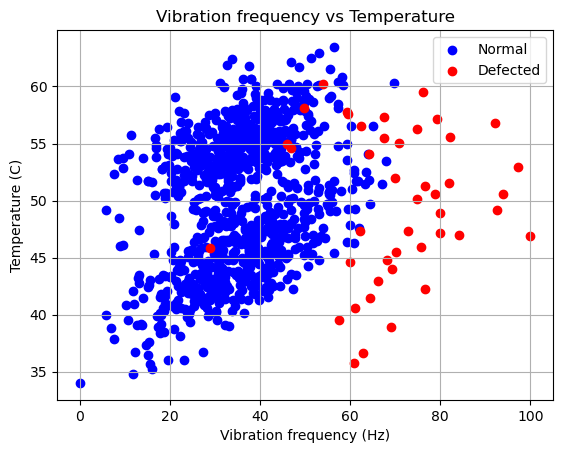

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read and separate into features (inputs) and response (output)
raw_data = pd.read_csv("data.csv")
features = raw_data[['Vibration frequncy (Hz)','Temparature (C)']].to_numpy()
response = raw_data['Label'].to_numpy()

# Separate normal and defected components
normal = features[[i for i, v in enumerate(response) if v == 0]]
defected = features[[i for i, v in enumerate(response) if v == 1]]

# Plotting
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal')
plt.scatter(defected[:, 0], defected[:, 1], color='red', label='Defected')
plt.title('Vibration frequency vs Temperature')
plt.xlabel('Vibration frequency (Hz)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.show()

#### B. What are your observations regarding the distribution of classes? Identify if the dataset is balanced or imbalanced.

**Answer:** 
The dataset is imbalanced because the graphical representation of the inputs shows a lot more normal blades then defected blades. The defected blades tend to have a higher vibration frequency value compared to normal blades.

### 2. Data Splitting, Pre-processing and Model Training:

#### A. Split the dataset into 60% training, 20% validation, and 20% testing.
#### B. Train an ANN with 2 hidden layers of 20 neurons each.
#### C. Use ReLU activation for hidden layers and sigmoid activation for the output layer.
#### D. Train models with L2 regularization coefficients of 0, 0.01, and 1.


In [3]:
# Split data
X_temp, X_test, y_temp, y_test = train_test_split(features, response, test_size=0.2, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23)


# Standardize the data using only training data statistics
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Train ANN with L2 regularization coefficients of [0, 0.01, 1]
models = {
        '0': {},
        '0.01': {},
        '1': {}
        }


for coeff in models:
    model = Sequential([
        Dense(20, activation='relu', kernel_regularizer=l2(float(coeff)), input_shape=(X_train.shape[1],)),
        Dense(20, activation='relu', kernel_regularizer=l2(float(coeff))),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=32,verbose=0)

    models[coeff]['model'] = model
    models[coeff]['history'] = history

### 3. Compute Accuracy

#### A. Compute the accuracy for all models on validation dataset using the default threshold probability of 0.5.

In [4]:
# Compute accuracy for each model
for coeff in models:
    model = models[coeff]
    model['y_pred'] = (model['model'].predict(X_val) > 0.5).astype("int32").ravel()
    model['accuracy_score'] = accuracy_score(y_val, model['y_pred'])
    
    print(f"Model Accuracy with L2 regularization coefficient of {coeff}:     {model['accuracy_score']}")

7/7 [==============================] - 0s 1ms/step
Model Accuracy with L2 regularization coefficient of 0:     0.985
7/7 [==============================] - 0s 2ms/step
Model Accuracy with L2 regularization coefficient of 0.01:     0.985
7/7 [==============================] - 0s 2ms/step
Model Accuracy with L2 regularization coefficient of 1:     0.955


#### B. Based on accuracy, which models are performing well and which are not?

**Answer:** 
Based on the observed accuracy of each model, the observation can be made that the L2 regularization coefficients of 0 and 0.01 outperformed the coefficient of 1, and all 3 performed well.

#### C. Can accuracy be a sole metric for evaluating the model's performance? Why?

**Answer:** 
Accuracy cannot solely be determined from evaluating the model's performance because of imbalanced datasets, cost sensitivity, etc.

### 4. Loss and accuracy vs Epoch Visualization

#### A. Plot the loss and accuracy vs epoch for both training and validation sets.

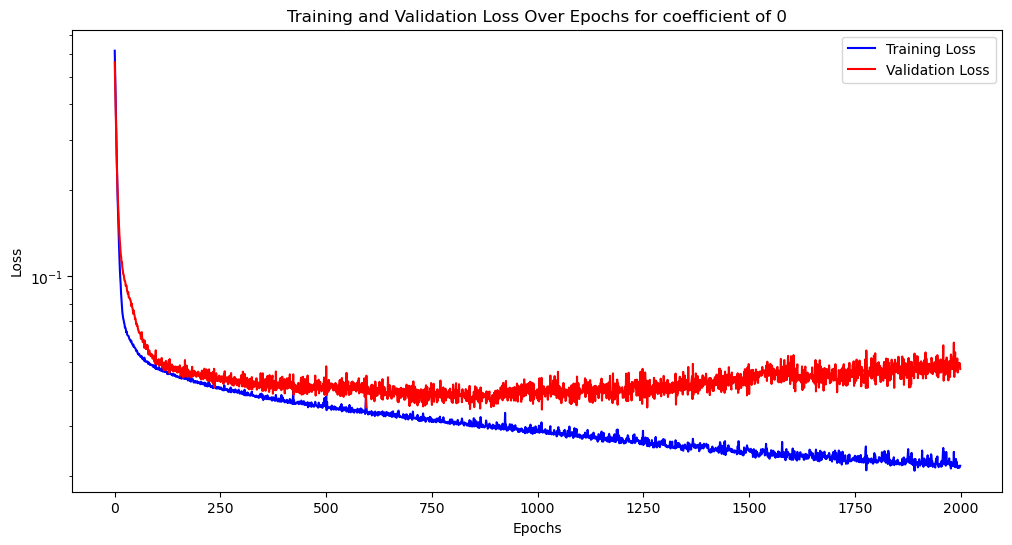

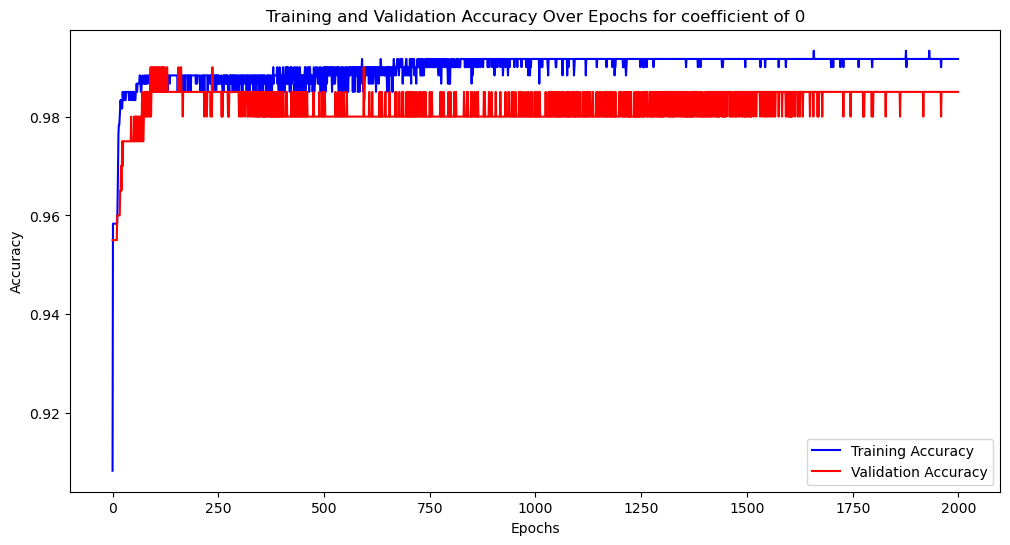

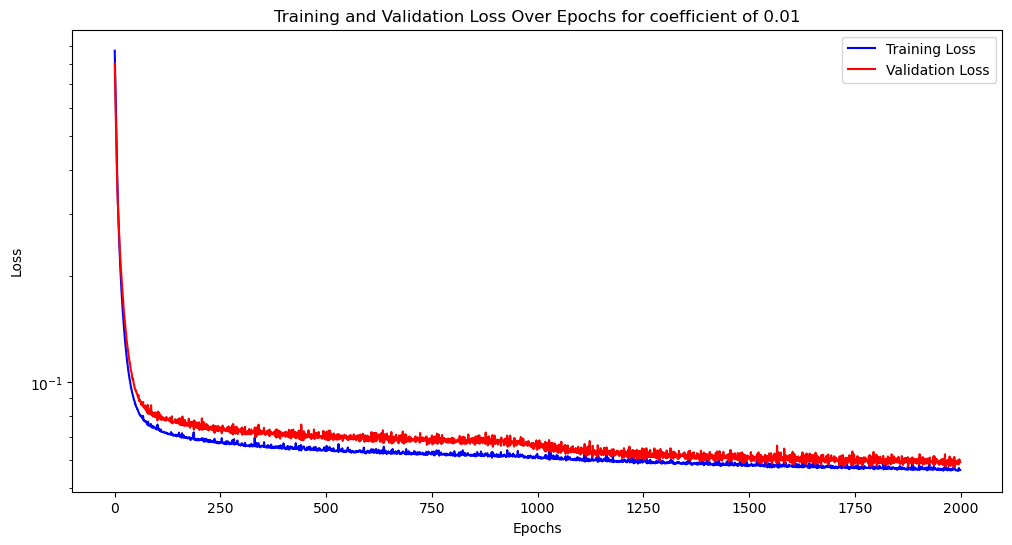

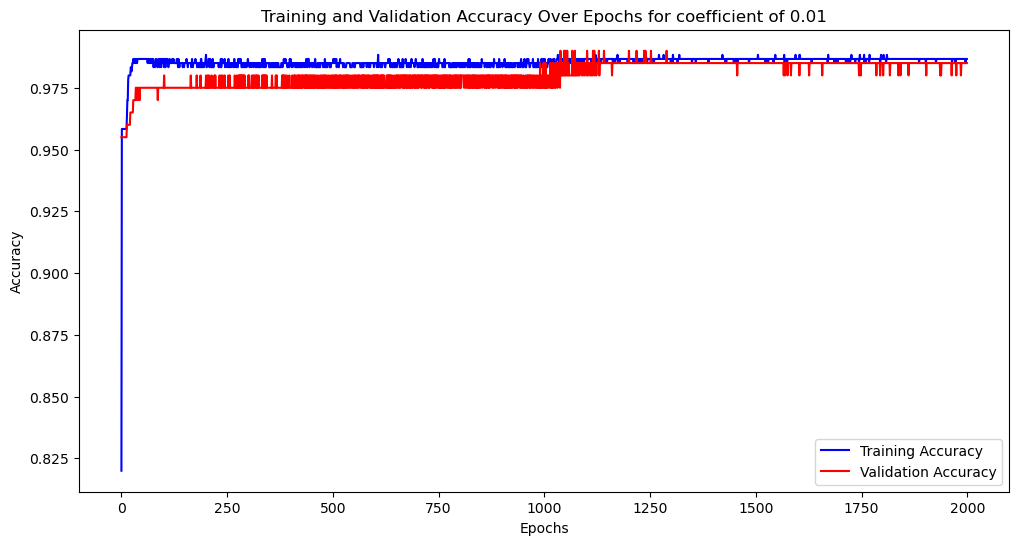

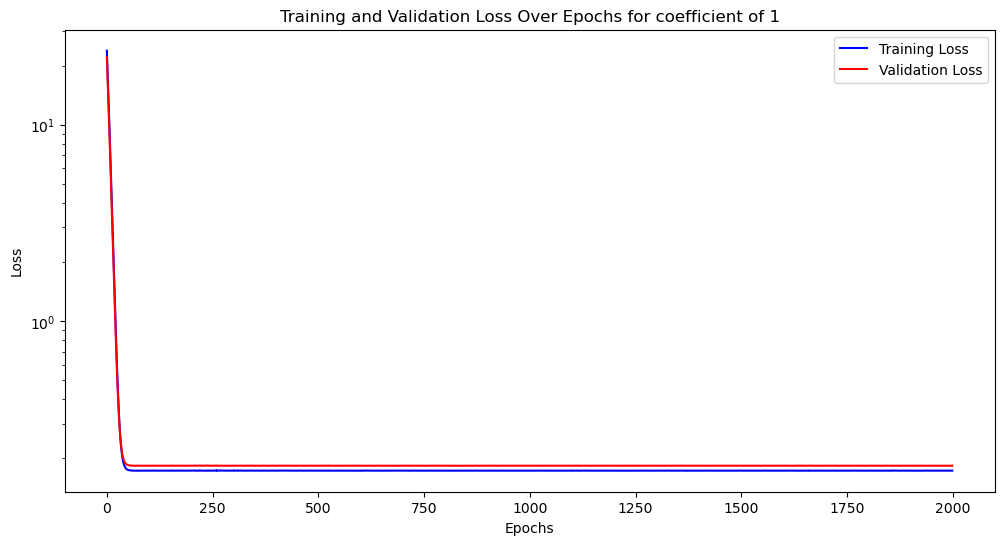

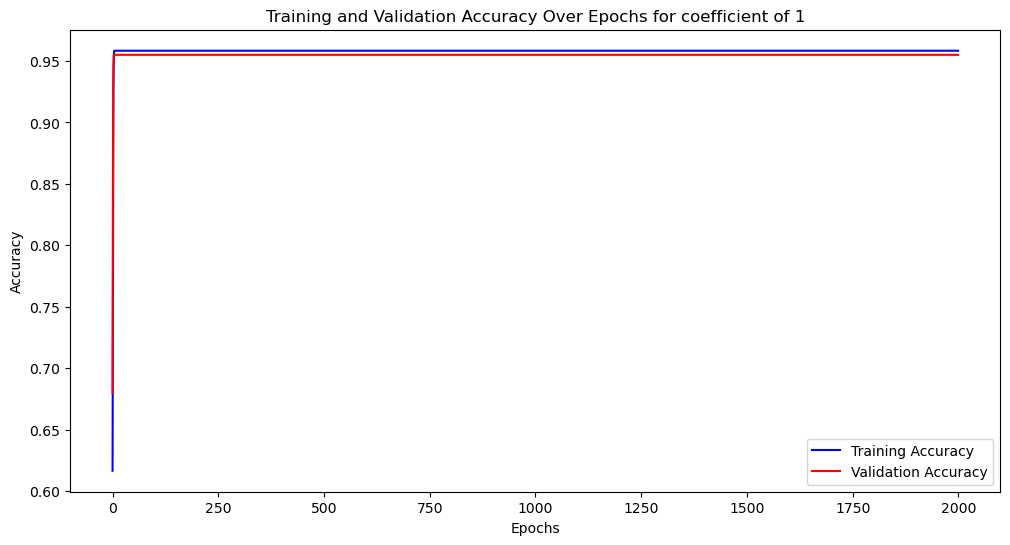

In [5]:
# Plot loss and accuracy vs epoch visualization for each model
for coeff in models:
    model = models[coeff]
    model['train_loss'] = model['history'].history['loss']
    model['val_loss'] = model['history'].history['val_loss']
    model['train_accuracy'] = model['history'].history['accuracy']
    model['val_accuracy'] = model['history'].history['val_accuracy']
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    plt.plot(model['train_loss'], label='Training Loss', color='blue')
    plt.plot(model['val_loss'], label='Validation Loss', color='red')
    plt.title('Training and Validation Loss Over Epochs for coefficient of ' + coeff)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.legend()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)  # 1 row, 2 columns, plot 1
    plt.plot(model['train_accuracy'], label='Training Accuracy', color='blue')
    plt.plot(model['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy Over Epochs for coefficient of ' + coeff)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

#### B. Which models are performing well based on these plots, and which are not? Justify your answer.

**Answer:** 
The loss over epochs models with L2 coefficients of 0.01 and 1 are better than the 0. The loss over epochs model for L2 coefficient of 0 is not good because the validation loss starts to increase as the training loss continues to decrease, showing signs of overfitting. The model for L2 coefficient of 1 does not vary, indicating that there is no improvement after a given time indicating that 0.01 is the best model for this application.

### 5. Compute ROC-AUC

#### A. Use sklearn.metrics to get Receiver Operating Characteristic (ROC) curve and plot it, then compute the Area Under the Curve (AUC) value for each model.

7/7 [==============================] - 0s 2ms/step


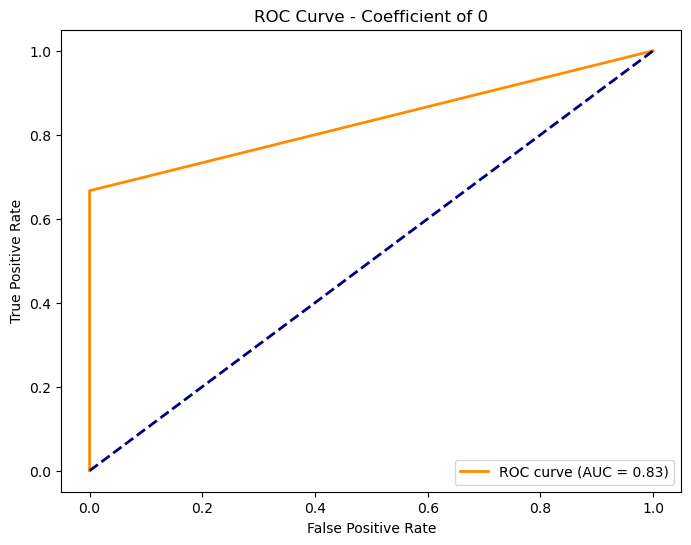

7/7 [==============================] - 0s 2ms/step


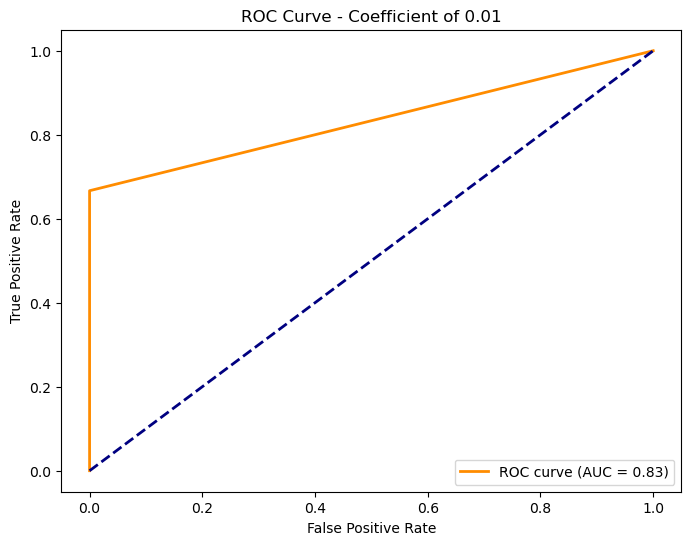

7/7 [==============================] - 0s 2ms/step


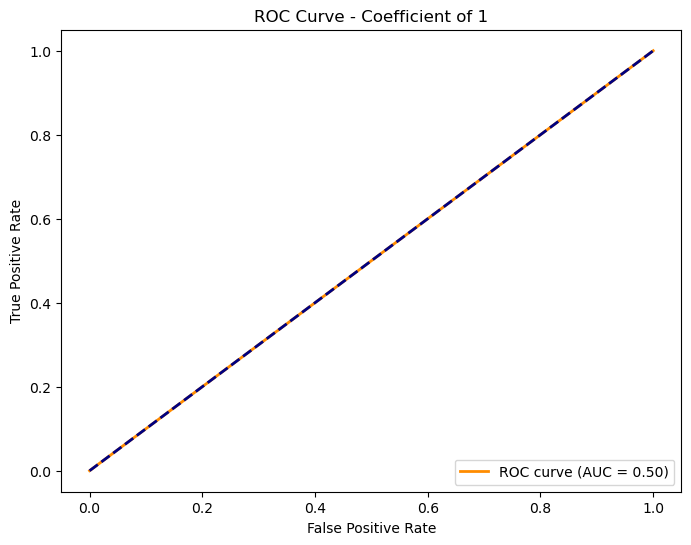

In [6]:
# Plot ROC curve and compute AUC for each model
for coeff in models:
    model = models[coeff]
    y_pred_prob = (model['model'].predict(X_val) > 0.5).astype("int32").ravel()
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Coefficient of {coeff}')
    plt.legend(loc='lower right')
    plt.show()

#### B. How does the ROC-AUC score correlate with the model's ability to distinguish between the classes?

**Answer:** 
The ROC-AUC score measures the area under the ROC curve, which represents the trade-off between the true positive rate and the false positive rate. A higher ROC-AUC score indicates that the model has better discrimination ability, meaning it can better distinguish between the positive and negative classes.

#### C. Which models, according to the ROC-AUC score, are acceptable, and why?

**Answer**: 
According to the ROC-AUC score, the model with L2 coefficient of 0 and 0.01 performed similiarly, and 1 being the worst. 

### 6. Compute other metrics

Use sklearn.metrics to compute the metrics: accuracy, F1-Score, specificity, balanced accuracy, precision, recall, and confusion matrix for each model. Please use the default threshold probability 0.5. What observations can you make based on the computed metrics?

In [7]:
# Compute metrics for each model
for coeff in models:
    model = models[coeff]
    y_pred = (model['model'].predict(X_val) > 0.5).astype("int32").ravel()
    
    print(f"Metrics for model with L2 regularization coefficient of {coeff}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print(f"Precision: {precision_score(y_val, y_pred)}")
    print(f"Recall: {recall_score(y_val, y_pred)}")
    print(f"F1-Score: {f1_score(y_val, y_pred)}")
    print(f"Specificity: {confusion_matrix(y_val, y_pred)[0, 0] / (confusion_matrix(y_val, y_pred)[0, 0] + confusion_matrix(y_val, y_pred)[0, 1])}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_val, y_pred)}")
    print()


7/7 [==============================] - 0s 702us/step
Metrics for model with L2 regularization coefficient of 0:
Confusion Matrix:
[[191   0]
 [  3   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       191
           1       1.00      0.67      0.80         9

    accuracy                           0.98       200
   macro avg       0.99      0.83      0.90       200
weighted avg       0.99      0.98      0.98       200

Accuracy: 0.985
Precision: 1.0
Recall: 0.6666666666666666
F1-Score: 0.8
Specificity: 1.0
Balanced Accuracy: 0.8333333333333333

7/7 [==============================] - 0s 3ms/step
Metrics for model with L2 regularization coefficient of 0.01:
Confusion Matrix:
[[191   0]
 [  3   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       191
           1       1.00      0.67      0.80         9

    accuracy                

c:\Users\Michael Hager\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Michael Hager\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Michael Hager\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

**Answer:** 
From the F1 score, we can see that the best model is with L2 coefficient of 0 and 0.01, and 1 being the worst model for this application.

### 7. Decision Boundary Visualization

#### A. Plot the decision boundaries for the trained models on training dataset

7813/7813 [==============================] - 12s 2ms/step


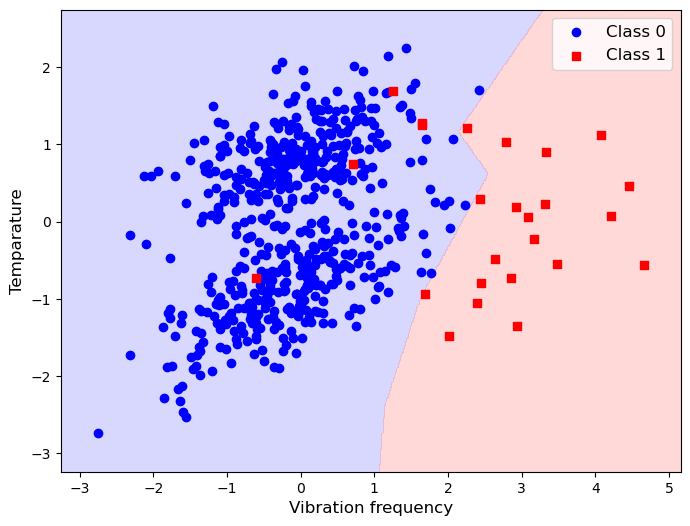

7813/7813 [==============================] - 18s 2ms/step


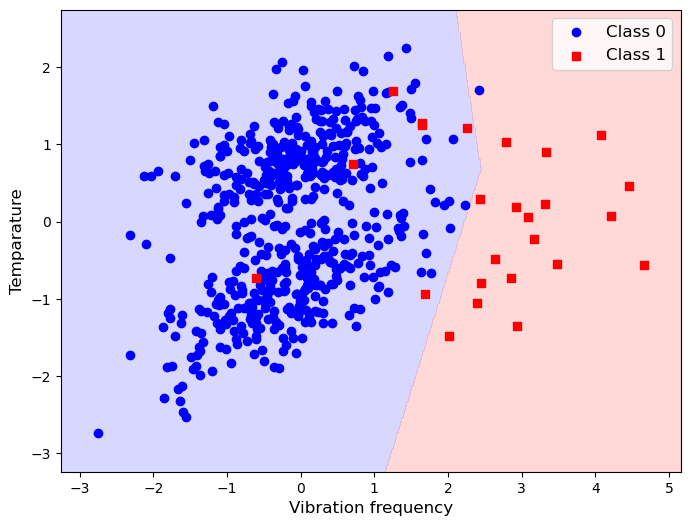

7813/7813 [==============================] - 17s 2ms/step


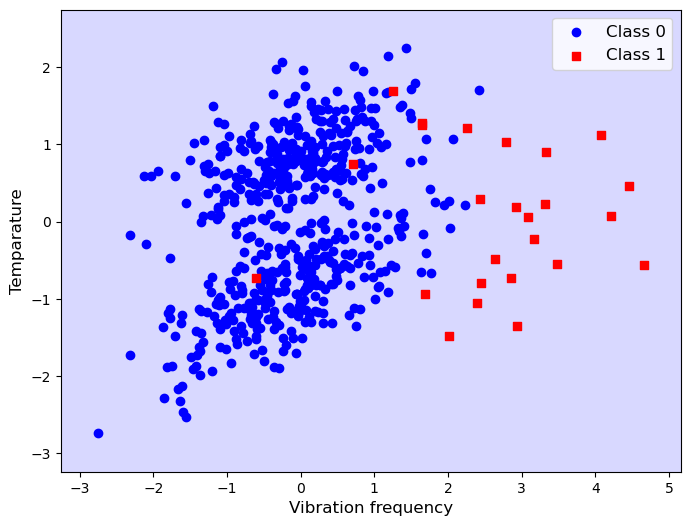

In [8]:
# Plot decision boundary for trained models on training dataset
x0s = np.linspace(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, 500)
x1s = np.linspace(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5, 500)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]

for coeff in models:
    model = models[coeff]
    y_pred = (model['model'].predict(X_new) > 0.5).astype("int32").ravel()
    zz = y_pred.reshape(x0.shape)
    contour_colors = [(0.5, 0.5, 1), (1, 0.5, 0.5)]

    fig, ax = plt.subplots(1,1, figsize=(8, 6), sharey=True)
    ax.set_xlabel("Vibration frequency", fontsize=12)
    ax.set_ylabel("Temparature", fontsize=12)
    ax.contourf(x0, x1, zz, levels=[0, 0.5, 1], colors=contour_colors, alpha=0.3)
        
    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c="blue", label="Class 0")
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c="red", label="Class 1",marker='s')    

    ax.legend(fontsize=12)
    plt.show()

#### B. Explain your observations and relate them with the computed evaluation metrics.

**Answer:** 
From the decision bondary visualization graph for L2 coefficient of 0, the boundaries seem to be very accurate, but also very complicated. The decision boundary visualization graph for L2 coefficient of 0.01 is the simplist boundary that also has a high accuracy and precision, while the boundary for coefficient of 1 just classifies everything as class 0 which is not good.

### 8. Model selection

Based on step 3-7, which model will you select as your classifier?

**Answer:** 
Based on these steps, I am going to choose the model with the L2 coefficient of 0.01. Although L2 coefficient of 0 and 0.01 had some similiar performance, coefficient of 0 seems to be overfitted which indicates that there won't be the same amount of success on unseen data. L2 coefficient of 1 has been underperforming and is not a good option overall. 

### 9. Threshold Selection

#### A. For this problem, decide whether precision or recall is more critical. Justify your choice.
In this application, recall is more important because false negatives would be costly. If a blade was false negative, this would indicate that we would be treating a blade with a defect as if it was normal. This could result in safety concerns in the future. 

**Answer:** 

#### B. Utilizing your chosen model, generate a plot for the Precision-Recall curve. How do precision and recall values change relative to each other?

7/7 [==============================] - 0s 2ms/step


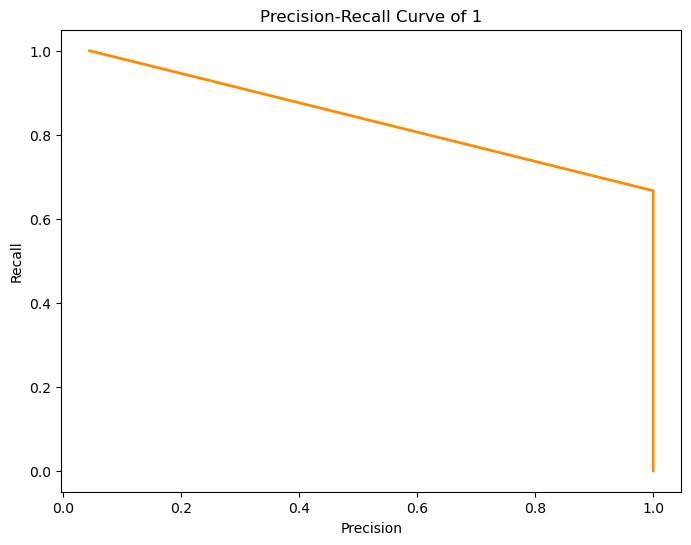

In [9]:
# Chosen model is 0.01
model = models['0.01']

# Predicting probabilities
y_pred = (model['model'].predict(X_val) > 0.5).astype("int32").ravel()

# Get the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(precision, recall, color='darkorange', lw=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title(f'Precision-Recall Curve of {coeff}')
plt.show()

**Answer:** 

#### C. Utilizing your chosen model, plot recall and precision as a function of the threshold value on the validation data. Use two y-axes to visualize precision and recall on the same plot.

7/7 [==============================] - 0s 2ms/step


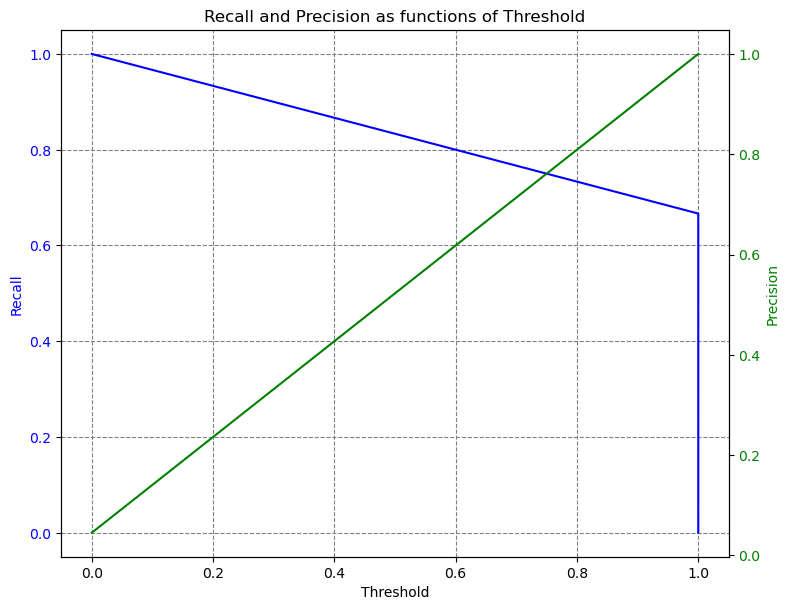

In [10]:
# Chosen model
model = models['0.01']

# Predicting probabilities
y_pred = (model['model'].predict(X_val) > 0.5).astype("int32").ravel()

# Get the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)

thresholds = np.append(thresholds, 1)

# Plot Recall as a function of Threshold
fig, ax1 = plt.subplots(figsize=(8, 6))
plt.grid(True,which='both', axis='both', linestyle='--', color='gray')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Recall', color='blue')
ax1.plot(thresholds, recall, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

ax2.set_ylabel('Precision', color='green')
ax2.plot(thresholds, precision, color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()  # To ensure the right y-label is not slightly clipped
plt.title('Recall and Precision as functions of Threshold')
plt.show()

#### D: Examine the effects of adjusting the threshold probability on the values of recall and precision. Specifically, analyze how increasing the threshold above 0.5 or decreasing it below 0.5 impacts these metrics. Discuss the implications of these adjustments for model performance and decision-making in the context of defect detection

**Answer:**
Adjusting the threshold probability changes the intersection between the threshold line and the precision-recall curve. A decreased threshold probability increases the threshold value in the intersection, and vice versa. Lowering the threshold probability increases recall and decreases precision, and vice versa.  

#### E. Use the plot generated in question C, and determine a threshold probability value for classification such that the chosen metric (either precision or recall) is equal or greater than 0.8 while keeping the other metric as high as possible. 

In [12]:
# Chosen model
model = models['0.01']

# Predicting probabilities
y_pred_prob = model['model'].predict(X_val)

# Get the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)


chosen_threshold = None
other_metric_value = -1  # Initialize to a low value
target_metric='recall'
target_value=0.8

# Iterate over precision-recall pairs
for i in range(len(precision)):
    # Check if precision or recall meets the target value
    if target_metric == 'precision' and precision[i] >= target_value:
        # Store the threshold corresponding to precision >= target_value
        chosen_threshold = thresholds[i]
        index = i
        # Check if recall is higher than the previous highest value
        if recall[i] > other_metric_value:
            other_metric_value = recall[i]
    elif target_metric == 'recall' and recall[i] >= target_value:
        # Store the threshold corresponding to recall >= target_value
        chosen_threshold = thresholds[i]
        index = i
        # Check if precision is higher than the previous highest value
        if precision[i] > other_metric_value:
            other_metric_value = precision[i]

print("Chosen threshold:", chosen_threshold)


7/7 [==============================] - 0s 2ms/step
Chosen threshold: 0.21389526


### 10. Final Evaluation

#### A. Compute the recall and precision on the test data using the selected threshold value.

In [14]:
# Predicting probabilities on test data
y_pred_prob_test = model['model'].predict(X_test)

# Classify test data using the chosen threshold
y_pred_test = (y_pred_prob_test >= chosen_threshold).astype(int)

# Compute recall and precision on the test data
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)

print("Recall on test data:", recall_test)
print("Precision on test data:", precision_test)


7/7 [==============================] - 0s 2ms/step
Recall on test data: 0.9
Precision on test data: 0.9


#### B. Is the performance satisfactory? Discuss any potential improvements that could be made.

**Answer:** 
For this application, the recall and precision are 0.9 each which is good. This performance is satisfactory. Potential improvements may include building models over more then 2000 epochs allowing for more data, but this requires more time and resoruces. 